### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
!pip install tensorflow==2.0        ## For changing the version of the tensorflow

     |████████████████████████████████| 86.3MB 54kB/s 
     |████████████████████████████████| 3.8MB 57.8MB/s 
     |████████████████████████████████| 450kB 49.5MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
  Found existing installation: google-auth-oauthlib 0.4.0
    Uninstalling google-auth-oauthlib-0.4.0:
      Successfully uninstalled google-auth-oauthlib-0.4.0
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.0
    Uninstalling tensorflow-estimator-1.15.0:
      Successfully uninstalled tensorflow-estimator-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
# Import All necesssary libraries
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from keras import optimizers
import pandas as pd
import numpy as np

# Using Tensorflow Keras instead of the original Keras


In [155]:
tf.__version__

'2.0.0'

### Collect Data

In [0]:
import keras

In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [158]:
print(testY[0:5])

[9 2 1 1 6]


In [159]:
print("Train X shape is",trainX.shape)
print("Train Y shape is ", trainY.shape)
print("Test X shape is ", testX.shape)
print("Test Y shape is ", testY.shape)

('Train X shape is', (60000, 28, 28))
('Train Y shape is ', (60000,))
('Test X shape is ', (10000, 28, 28))
('Test Y shape is ', (10000,))


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY= tf.keras.utils.to_categorical(trainY, num_classes= 10)
testY= tf.keras.utils.to_categorical(testY, num_classes= 10)

In [161]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


### Visualize the data

Plot first 10 images in the triaining set and their labels.

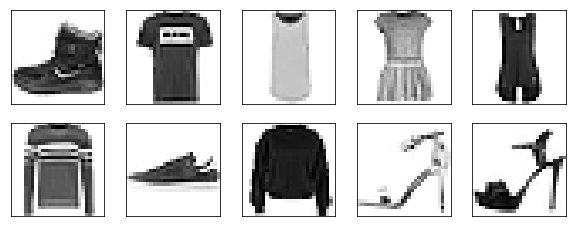

In [162]:
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(trainX[i], cmap='Greys')

 

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
#Reshape data from 2D to 1D :- 28*28 = 784
trainX=trainX.reshape(trainX.shape[0],784).astype('float32')
testX=testX.reshape(testX.shape[0],784).astype('float32')

## Convert it in the range of 0-1 so that relu an work on it
trainX = trainX / 255.0
testX = testX / 255.0                         

In [0]:
# Initialize the constructor

model = tf.keras.models.Sequential()

# Define model architecture

model.add(tf.keras.layers.Dense(784,activation='relu'))
model.add(tf.keras.layers.Dense(784,activation='sigmoid'))

model.add(tf.keras.layers.Dense(10, activation ='softmax'))


In [0]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [0]:
epochs = 60
batch_size = 10000

### Execute the model using model.fit()

In [167]:
history= model.fit(trainX, trainY, batch_size=batch_size, epochs=epochs,  validation_split=.1, verbose=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/60
54000/54000 [==============================] - 7s 135us/sample - loss: 2.3762 - accuracy: 0.1045 - val_loss: 2.2920 - val_accuracy: 0.1658
Epoch 2/60
54000/54000 [==============================] - 7s 128us/sample - loss: 2.2830 - accuracy: 0.1915 - val_loss: 2.2635 - val_accuracy: 0.2343
Epoch 3/60
54000/54000 [==============================] - 7s 129us/sample - loss: 2.2575 - accuracy: 0.2594 - val_loss: 2.2435 - val_accuracy: 0.3048
Epoch 4/60
54000/54000 [==============================] - 7s 128us/sample - loss: 2.2372 - accuracy: 0.3321 - val_loss: 2.2236 - val_accuracy: 0.3775
Epoch 5/60
54000/54000 [==============================] - 7s 128us/sample - loss: 2.2175 - accuracy: 0.4017 - val_loss: 2.2043 - val_accuracy: 0.4438
Epoch 6/60
54000/54000 [==============================] - 7s 128us/sample - loss: 2.1979 - accuracy: 0.4631 - val_loss: 2.1847 - val_accuracy: 0.4822
Epoch 7/60
54000/54000 [===========================

[0.16583334, 0.23433334, 0.30483332, 0.3775, 0.44383332, 0.48216668, 0.51566666, 0.54583335, 0.5678333, 0.5733333, 0.6015, 0.60433334, 0.6113333, 0.62083334, 0.62666667, 0.633, 0.62916666, 0.63816667, 0.63666666, 0.6446667, 0.64433336, 0.64533335, 0.6393333, 0.65, 0.656, 0.6586667, 0.659, 0.65683335, 0.65716666, 0.659, 0.66, 0.66, 0.6648333, 0.668, 0.66, 0.6685, 0.6676667, 0.66816664, 0.667, 0.66183335, 0.6616667, 0.66566664, 0.671, 0.6791667, 0.675, 0.6818333, 0.6806667, 0.68083334, 0.6816667, 0.68416667, 0.6868333, 0.68666667, 0.6856667, 0.68866664, 0.68766665, 0.6905, 0.68983334, 0.68916667, 0.692, 0.69016665]
[0.1045, 0.19148149, 0.25944445, 0.33207408, 0.40168518, 0.4630926, 0.49496296, 0.52635187, 0.54818517, 0.5687407, 0.57225925, 0.5955, 0.6024815, 0.604537, 0.60994446, 0.61955553, 0.62575924, 0.62483335, 0.6328704, 0.63218516, 0.63766664, 0.63887036, 0.64207405, 0.6374074, 0.6428518, 0.64655554, 0.6492037, 0.6494815, 0.6495, 0.6494074, 0.65185183, 0.65283334, 0.65051854, 0.657

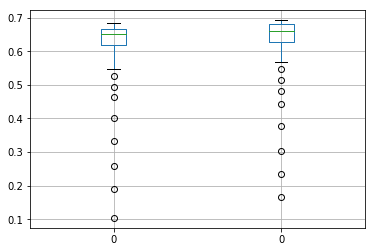

In [168]:
print(history.history['val_accuracy'])

print(history.history['accuracy'])

ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

In [169]:
loss, acc = model.evaluate(testX,testY, verbose=2)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

10000/1 - 1s - loss: 1.3172 - accuracy: 0.6814
Accuracy: 0.681
Loss: 1.331


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
# Initialize the constructor again

model1 = tf.keras.models.Sequential()

## Adding batch normalizer to the above code

model1.add(tf.keras.layers.Dense(784,activation='relu'))
model1.add(tf.keras.layers.Dense(784,activation='sigmoid'))
model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.Dense(10, activation ='softmax'))

model1.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

eopchs=60
batch_size=10000

### Execute the model

In [174]:
history= model1.fit(trainX, trainY, batch_size=batch_size, epochs=epochs,  validation_split=.1, verbose=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/60
54000/54000 [==============================] - 8s 153us/sample - loss: 1.6813 - accuracy: 0.4293 - val_loss: 2.2826 - val_accuracy: 0.1978
Epoch 2/60
54000/54000 [==============================] - 8s 141us/sample - loss: 0.9722 - accuracy: 0.6745 - val_loss: 2.2316 - val_accuracy: 0.1980
Epoch 3/60
54000/54000 [==============================] - 8s 141us/sample - loss: 0.8331 - accuracy: 0.7180 - val_loss: 2.1967 - val_accuracy: 0.1978
Epoch 4/60
54000/54000 [==============================] - 8s 141us/sample - loss: 0.7610 - accuracy: 0.7422 - val_loss: 2.1658 - val_accuracy: 0.1977
Epoch 5/60
54000/54000 [==============================] - 8s 141us/sample - loss: 0.7143 - accuracy: 0.7573 - val_loss: 2.1383 - val_accuracy: 0.1977
Epoch 6/60
54000/54000 [==============================] - 8s 142us/sample - loss: 0.6806 - accuracy: 0.7685 - val_loss: 2.1106 - val_accuracy: 0.1987
Epoch 7/60
54000/54000 [===========================

In [175]:
loss, accuracy = model1.evaluate(testX,testY, verbose=2)
print('Accuracy: %.3f'  % accuracy)
print('Loss: %.3f' % loss)

10000/1 - 2s - loss: 0.8319 - accuracy: 0.8328
Accuracy: 0.833
Loss: 0.910


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
# Initialize the constructor again
model2 = tf.keras.models.Sequential()

#First layer 
model2.add(tf.keras.layers.Dense(784,activation='relu'))
model.add(tf.keras.layers.Dense(784,activation='sigmoid'))

#Normalize the data
model2.add(tf.keras.layers.BatchNormalization())

#output layer 
model2.add(tf.keras.layers.Dense(10, activation ='softmax'))

sgd = optimizers.SGD(lr=0.001)
model2.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

epochs=60
batch_size=10000

In [178]:
history= model2.fit(trainX, trainY, batch_size=batch_size, epochs=epochs,  validation_split=.1, verbose=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/60
54000/54000 [==============================] - 4s 79us/sample - loss: 2.0068 - accuracy: 0.3486 - val_loss: 1.9469 - val_accuracy: 0.3675
Epoch 2/60
54000/54000 [==============================] - 4s 69us/sample - loss: 1.0574 - accuracy: 0.6586 - val_loss: 1.8185 - val_accuracy: 0.4730
Epoch 3/60
54000/54000 [==============================] - 4s 69us/sample - loss: 0.8936 - accuracy: 0.7068 - val_loss: 1.7380 - val_accuracy: 0.5313
Epoch 4/60
54000/54000 [==============================] - 4s 68us/sample - loss: 0.8111 - accuracy: 0.7314 - val_loss: 1.6756 - val_accuracy: 0.5697
Epoch 5/60
54000/54000 [==============================] - 4s 69us/sample - loss: 0.7572 - accuracy: 0.7482 - val_loss: 1.6201 - val_accuracy: 0.6063
Epoch 6/60
54000/54000 [==============================] - 4s 69us/sample - loss: 0.7180 - accuracy: 0.7607 - val_loss: 1.5734 - val_accuracy: 0.6303
Epoch 7/60
54000/54000 [==============================] -

[0.3675, 0.473, 0.5313333, 0.5696667, 0.6063333, 0.6303333, 0.6545, 0.66966665, 0.691, 0.70633334, 0.71933335, 0.72716665, 0.74083334, 0.7495, 0.7553333, 0.76133335, 0.76766664, 0.7736667, 0.7773333, 0.78433335, 0.7875, 0.7913333, 0.7938333, 0.79616666, 0.7975, 0.8013333, 0.8038333, 0.8055, 0.8068333, 0.81016666, 0.81133336, 0.815, 0.816, 0.81633335, 0.81633335, 0.8178333, 0.8206667, 0.8211667, 0.823, 0.82283336, 0.82533336, 0.8255, 0.826, 0.8265, 0.82816666, 0.82783335, 0.8293333, 0.8286667, 0.83133334, 0.832, 0.8333333, 0.83466667, 0.83466667, 0.83683336, 0.83716667, 0.8376667, 0.83916664, 0.8375, 0.8395, 0.84066665]
[0.34855556, 0.6585926, 0.7068148, 0.7314444, 0.7481667, 0.7607037, 0.76985186, 0.77787036, 0.7838333, 0.78892595, 0.79411113, 0.7981296, 0.80222225, 0.80546296, 0.80833334, 0.8115185, 0.8140741, 0.81651855, 0.8192593, 0.8206667, 0.82294446, 0.8248519, 0.82640743, 0.8275, 0.8292222, 0.8300185, 0.8319815, 0.83305556, 0.83446294, 0.836, 0.8365741, 0.83753705, 0.8386296, 0.

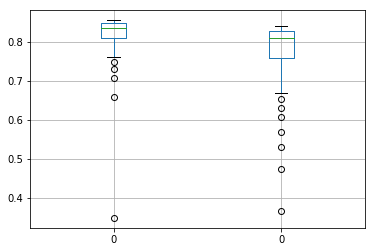

In [179]:
print(history.history['val_accuracy'])

print(history.history['accuracy'])

ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

In [181]:
loss1, acc1 = model2.evaluate(testX,testY, verbose=2)
print('Accuracy: %.3f'  % acc1)
print('Loss: %.3f' % loss1)

10000/1 - 1s - loss: 0.4649 - accuracy: 0.8257
Accuracy: 0.826
Loss: 0.551


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
# Initialize the constructor again
model3 = tf.keras.models.Sequential()

#First layer 
model3.add(tf.keras.layers.Dense(100,activation='sigmoid'))

#Second Dense layer 
model3.add(tf.keras.layers.Dense(100,activation='sigmoid'))

#Normalize the data
model3.add(tf.keras.layers.BatchNormalization())

#output layer -Third layer
model3.add(tf.keras.layers.Dense(10, activation ='softmax'))


sgd = optimizers.SGD(lr=0.03)
model3.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

batch_size=10000
epochs=60

### Run the model

In [184]:
history= model3.fit(trainX, trainY, batch_size=batch_size, epochs=epochs,  validation_split=.1, verbose=True)
loss,accuracy  = model3.evaluate(testX, testY, verbose=False)

Train on 54000 samples, validate on 6000 samples
Epoch 1/60
54000/54000 [==============================] - 1s 26us/sample - loss: 2.1877 - accuracy: 0.1931 - val_loss: 2.6648 - val_accuracy: 0.0942
Epoch 2/60
54000/54000 [==============================] - 1s 14us/sample - loss: 1.7313 - accuracy: 0.4254 - val_loss: 2.6215 - val_accuracy: 0.0942
Epoch 3/60
54000/54000 [==============================] - 1s 14us/sample - loss: 1.4821 - accuracy: 0.5188 - val_loss: 2.5850 - val_accuracy: 0.0942
Epoch 4/60
54000/54000 [==============================] - 1s 14us/sample - loss: 1.3307 - accuracy: 0.5670 - val_loss: 2.5527 - val_accuracy: 0.0942
Epoch 5/60
54000/54000 [==============================] - 1s 14us/sample - loss: 1.2296 - accuracy: 0.5994 - val_loss: 2.5232 - val_accuracy: 0.0942
Epoch 6/60
54000/54000 [==============================] - 1s 15us/sample - loss: 1.1569 - accuracy: 0.6240 - val_loss: 2.4959 - val_accuracy: 0.0942
Epoch 7/60
54000/54000 [==============================] -

In [185]:
loss,accuracy  = model3.evaluate(testX, testY, verbose=False)
print('Accuracy: %.3f'  % accuracy)
print('Loss: %.3f' % loss)

Accuracy: 0.688
Loss: 1.428


# Review The Model

In [186]:
model3.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_107 (Dense)            multiple                  78500     
_________________________________________________________________
dense_108 (Dense)            multiple                  10100     
_________________________________________________________________
batch_normalization_31 (Batc multiple                  400       
_________________________________________________________________
dense_109 (Dense)            multiple                  1010      
Total params: 90,010
Trainable params: 89,810
Non-trainable params: 200
_________________________________________________________________


In [0]:
## Conclusion:-
# Model 1 performed better with 83.3% accuracy.